# Basic Tag Generation using NLTK

This notebook demonstrates a simple approach to generate tags from vehicle repair descriptions using the Natural Language Toolkit (NLTK).

In [9]:
# Step 1: Import libraries
import pandas as pd
import nltk
import re
from collections import Counter

# Download necessary NLTK resources
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\prabhakula.v\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\prabhakula.v\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

## Load and View the Data

Let's first load our data and take a look at a few examples.

In [10]:
# Step 2: Load data
df = pd.read_excel('DA -Task 2..xlsx')

# Display info about the dataframe
print(f"Total records: {len(df)}")
print(f"Columns in the dataframe: {df.columns.tolist()}")

# Look at a few examples
print("\nSample repair descriptions:")
for i in range(3):
    if i < len(df):
        print(f"\nExample {i+1}:")
        print(f"Description: {df['CUSTOMER_VERBATIM'].iloc[i] if 'CUSTOMER_VERBATIM' in df.columns else 'Column not found'}")

FileNotFoundError: [Errno 2] No such file or directory: 'DA -Task 2..xlsx'

## Create a Simple Tag Generation Function

Now we'll create a very simple function that uses NLTK to:
1. Tokenize the text (split into words)
2. Remove stopwords (common words like "the", "and", etc.)
3. Find the most common words to use as tags

In [ ]:
# Step 3: Define a simple tag generation function
def generate_tags(text):
    if pd.isna(text):  # Handle NaN values
        return []
        
    # Convert to lowercase
    text = str(text).lower()
    
    # Tokenize the text (split into words)
    tokens = nltk.word_tokenize(text)
    
    # Remove stopwords (common words like "the", "and", etc.)
    stopwords = nltk.corpus.stopwords.words('english')
    tokens = [word for word in tokens if word.isalpha() and word not in stopwords]
    
    # Count word frequencies
    word_counts = Counter(tokens)
    
    # Get the 5 most common words as tags
    tags = [word for word, count in word_counts.most_common(5)]
    
    return tags

# Test the function on an example
if len(df) > 0 and 'CUSTOMER_VERBATIM' in df.columns:
    example_text = df['CUSTOMER_VERBATIM'].iloc[0]
    print(f"Example text: {example_text}")
    print(f"Generated tags: {generate_tags(example_text)}")
else:
    print("Cannot test function - dataframe is empty or missing required column")

Example text: STEERING WHEEL COMING APART
Generated tags: ['steering', 'wheel', 'coming', 'apart']


## Apply to the Dataset

Let's apply our tag generation function to all the repair descriptions and add them as a new column in the dataframe.

In [ ]:
# Step 4: Apply tag generation to all rows
if 'CUSTOMER_VERBATIM' in df.columns:
    # Generate tags for each description
    df['nltk_tags'] = df['CUSTOMER_VERBATIM'].apply(generate_tags)

    # Convert the list of tags to a comma-separated string for better viewing
    df['tags_string'] = df['nltk_tags'].apply(lambda x: ', '.join(x))

    # Display the first 5 rows with descriptions and new tags
    pd.set_option('display.max_colwidth', None)
    sample_display = df[['CUSTOMER_VERBATIM', 'tags_string']].head(5)
    print(sample_display)
else:
    print("Cannot generate tags - CUSTOMER_VERBATIM column not found")

                                                                                                       CUSTOMER_VERBATIM  \
0                                                                                            STEERING WHEEL COMING APART   
1                                                                             CUSTOMER STATES HEATED STEERING WHEEL INOP   
2  OWNER REPORTS: THE SUPER CRUISE BAR ON THE STEERING WHEEL IS COMING OF F. CHECK AND ADVISE. ADVISOR RUNNING PRA TOOL.   
3                               CUSTOMER STATES THE LETTERING AND FINISH ON THE STEERING WHEEL IS COMING OFF. Plant: SIL   
4                                           C/S: CUSTOMER STATES THE SERVICE DRIVER ASSIST SYSTEM MESSAGE IS ON. A DVISE   

                                     tags_string  
0                 steering, wheel, coming, apart  
1      customer, states, heated, steering, wheel  
2             owner, reports, super, cruise, bar  
3  customer, states, lettering, finish, steering  


## Analyze the Generated Tags

Let's look at the most common tags across all repair descriptions.

In [ ]:
# Step 5: Analyze the generated tags
if 'nltk_tags' in df.columns:
    # Find most common tags across all descriptions
    all_tags = [tag for tags_list in df['nltk_tags'] for tag in tags_list]
    most_common_tags = Counter(all_tags).most_common(10)
    
    print("Most common tags across all descriptions:")
    for tag, count in most_common_tags:
        print(f"- {tag}: {count} occurrences")
    
    # Display tag count statistics
    tag_counts = df['nltk_tags'].apply(len)
    print("\nTag generation statistics:")
    print(f"Average number of tags per description: {tag_counts.mean():.2f}")
    print(f"Total unique tags generated: {len(set(all_tags))}")
else:
    print("No tags have been generated yet")

Most common tags across all descriptions:
- steering: 75 occurrences
- wheel: 65 occurrences
- customer: 54 occurrences
- states: 51 occurrences
- heated: 17 occurrences
- cust: 9 occurrences
- stitching: 7 occurrences
- leather: 6 occurrences
- sop: 6 occurrences
- coming: 5 occurrences

Tag generation statistics:
Average number of tags per description: 4.87
Total unique tags generated: 152


## Visualize the Top Tags

Let's create a simple bar chart to visualize the most common tags.

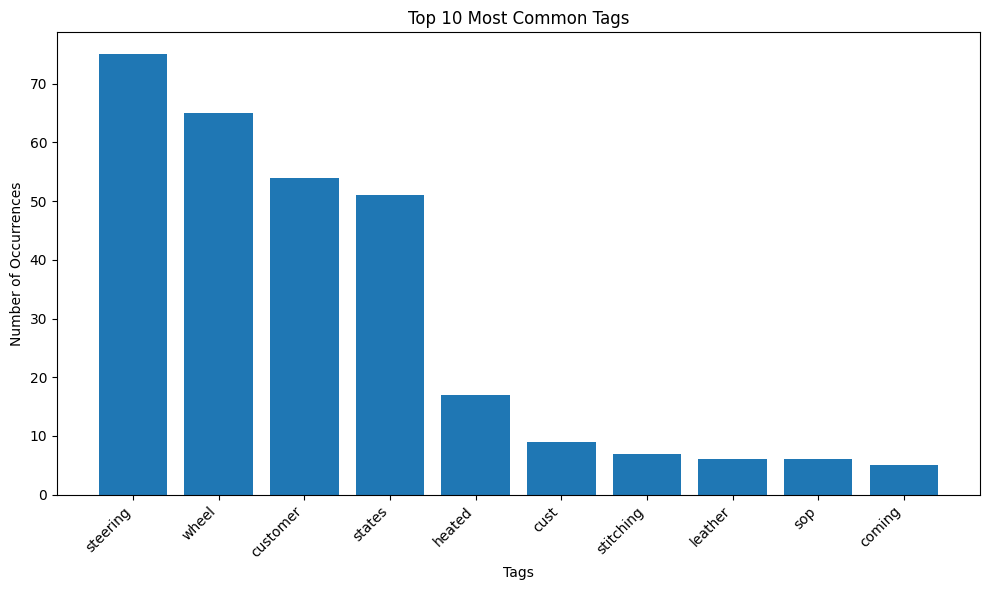

In [ ]:
# Step 6: Visualize top tags
import matplotlib.pyplot as plt

if 'nltk_tags' in df.columns:
    # Get the top 10 most common tags
    all_tags = [tag for tags_list in df['nltk_tags'] for tag in tags_list]
    most_common_tags = Counter(all_tags).most_common(10)
    
    # Create lists for plotting
    tags = [tag for tag, _ in most_common_tags]
    counts = [count for _, count in most_common_tags]
    
    # Create bar chart
    plt.figure(figsize=(10, 6))
    plt.bar(tags, counts)
    plt.title('Top 10 Most Common Tags')
    plt.xlabel('Tags')
    plt.ylabel('Number of Occurrences')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
else:
    print("Cannot visualize - tags have not been generated yet")

## Add Tags to Components and Failure Types

Let's categorize the tags into components and failure types to get better insights.

In [ ]:
# Step 7: Categorize tags
if 'nltk_tags' in df.columns:
    # Simple lists of component words and failure/action words
    # You can expand these lists based on your domain knowledge
    component_words = ['wheel', 'steering', 'brake', 'motor', 'rotor', 'battery', 
                      'tire', 'module', 'control', 'light', 'switch', 'cover']
    
    failure_words = ['vibration', 'noise', 'broken', 'damaged', 'inop', 'failing', 
                    'loose', 'replaced', 'repaired', 'apart', 'coming']
    
    # Function to categorize tags
    def categorize_tags(tags):
        components = [tag for tag in tags if tag in component_words]
        failures = [tag for tag in tags if tag in failure_words]
        others = [tag for tag in tags if tag not in component_words and tag not in failure_words]
        return components, failures, others
    
    # Apply to each row
    categorized = df['nltk_tags'].apply(categorize_tags)
    df['component_tags'] = [cat[0] for cat in categorized]
    df['failure_tags'] = [cat[1] for cat in categorized]
    
    # Display a sample
    print("Sample of categorized tags:")
    sample = df[['CUSTOMER_VERBATIM', 'component_tags', 'failure_tags']].head(5)
    print(sample)
else:
    print("Cannot categorize - tags have not been generated yet")

Sample of categorized tags:
                                                                                                       CUSTOMER_VERBATIM  \
0                                                                                            STEERING WHEEL COMING APART   
1                                                                             CUSTOMER STATES HEATED STEERING WHEEL INOP   
2  OWNER REPORTS: THE SUPER CRUISE BAR ON THE STEERING WHEEL IS COMING OF F. CHECK AND ADVISE. ADVISOR RUNNING PRA TOOL.   
3                               CUSTOMER STATES THE LETTERING AND FINISH ON THE STEERING WHEEL IS COMING OFF. Plant: SIL   
4                                           C/S: CUSTOMER STATES THE SERVICE DRIVER ASSIST SYSTEM MESSAGE IS ON. A DVISE   

      component_tags     failure_tags  
0  [steering, wheel]  [coming, apart]  
1  [steering, wheel]               []  
2                 []               []  
3         [steering]               []  
4                 []       

## Save the Results

Finally, let's save our dataframe with the new tags to a CSV file.

In [ ]:
# Step 8: Save the results
if 'CUSTOMER_VERBATIM' in df.columns and 'tags_string' in df.columns:
    # Save to CSV
    output_df = df.copy()
    output_df.to_csv('vehicle_repair_data_with_tags.csv', index=False)
    print("Saved results to 'vehicle_repair_data_with_tags.csv'")
else:
    print("Cannot save results - required columns are missing")

Saved results to 'vehicle_repair_data_with_tags.csv'


## Why This Basic NLTK Approach is Useful for Your Assignment

1. **Fulfills Task 2, Point 4**: Generates meaningful tags from free text fields
2. **Identifies Key Information**: Finds important components and failure conditions
3. **Easy to Explain**: The approach is simple and can be clearly explained in your report
4. **Actionable Insights**: The tag categories provide a foundation for stakeholder recommendations
5. **Visualization Ready**: The tag frequency data can be used for your required visualizations

For your report, you can discuss:
- How the tags help summarize the free text information
- The most common components and failure types identified
- Recommendations based on frequently occurring issues